In [1]:
import matplotlib.gridspec as gridspec
import scqubits
import numpy as np
from CoupledQuantumSystems.visualization import *
from CoupledQuantumSystems.systems import *
from tqdm import tqdm
from CoupledQuantumSystems.qobj_manip import *
# linestyles = ['-',(0,(3,1,1,1)),(0,(5,2,5,2))]
# linestyles = ['-','--',':']
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
linestyles = ['-','-','--']
linewidth_list = [1.75,1.75,1]

colors = ['#4999c3','#d5373d','black']

In [2]:
def plot_sweep_Er(ax,matrix, evals,Er_list,qls = [0,1,2],ylim=(-1,1),participating_transitions = None):
    num_evals =len(evals)

    if participating_transitions != None:
        for i in range(num_evals):
                for j in range(num_evals): 
                    if (i, j) not in participating_transitions and (j, i) not in participating_transitions:
                        matrix[i, j] = 0 

    for ql  in qls:
        color  = colors[ql]
        linestyle = linestyles[ql]
        shift_from_qubit_transition = []
        for Er in tqdm(Er_list, desc = "Er loop"):
            shifts = [get_shift_accurate(matrix[ql,ql2], evals[ql2], evals[ql], Er) for ql2 in range(num_evals)] 
            shift_from_qubit_transition.append(sum(shifts))
        ax.plot(Er_list, shift_from_qubit_transition, label=rf'$\chi_{ql}$',color = color, linestyle = linestyle)

    ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    ax.set_xlim(Er_list[0],Er_list[-1])
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_xlabel(rf'$\omega_r$')
    ax.legend()

Er loop: 100%|██████████| 10000/10000 [00:00<00:00, 92538.63it/s]
 /tmp/ipykernel_2361024/783681094.py: 21WARNING:fontTools.subset:MERG NOT subset; don't know how to subset; dropped


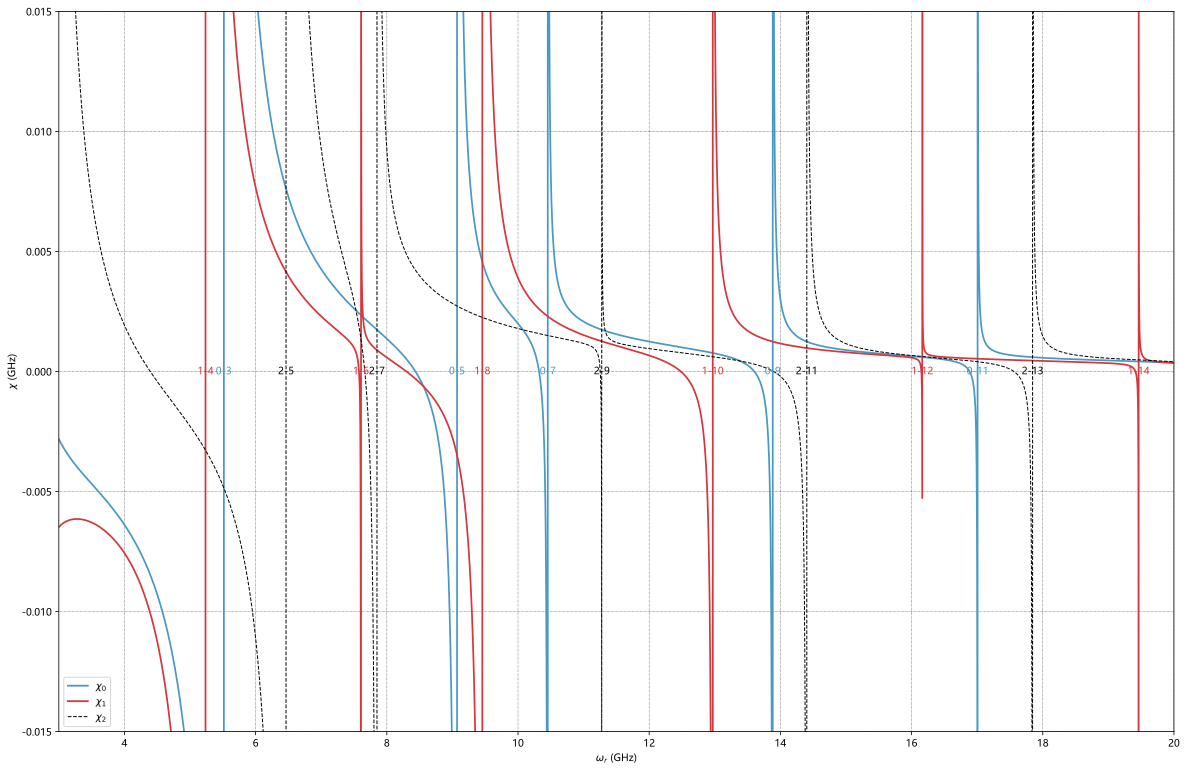

In [31]:
import matplotlib.pyplot as plt
fig,ax= plt.subplots(1,1,figsize=(20,13))
n_evals = 20
qbt0 = scqubits.Fluxonium(EJ = 4,EC = 4/2.2,EL = 4/29, cutoff = 110,flux = 0,truncated_dim=n_evals)
matrix0 =  qbt0.matrixelement_table(operator = "n_operator",evals_count=n_evals)
evals0 = qbt0.eigenvals(n_evals)
Er_list = np.linspace(3,20,int(1e4))
ylim  = (-0.015,0.015) # in GHz
for ql  in [0,1,2]:
    shift_from_qubit_transition = []
    for Er in tqdm(Er_list, desc = "Er loop"):
        shifts = [get_shift_accurate(matrix0[ql,ql2], evals0[ql2], evals0[ql], Er) for ql2 in range(n_evals)] 
        shift_from_qubit_transition.append(sum(shifts)/100)
    ax.plot(Er_list, 2*np.pi* np.array(shift_from_qubit_transition), label=rf'$\chi_{ql}$',color = colors[ql], linestyle = linestyles[ql],linewidth = linewidth_list[ql])
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax.set_xlim(Er_list[0],Er_list[-1])
ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel(rf'$\omega_r$')
ax.legend(loc= 'lower left')
ax.set_xlabel(rf'$\omega_r$ (GHz)')
ax.set_yticklabels([f'{val:.3f}' for val in ax.get_yticks()])
ax.set_ylabel(r'$\chi$ (GHz)')
y_offset = -0.000
x_offset = 0.0
for i in [0,1,2]:
    allowed_j = [i + 1+ 2*n for n in range(10) if i + 1+ 2*n < n_evals]
    for j in allowed_j:
        freq = evals0[j]-evals0[i]
        if freq > Er_list[0] and freq < Er_list[-1]:
            ax.text(freq+x_offset, 2*np.pi* y_offset,f"{i}-{j}",color = colors[i],ha='center',va='center')

Er loop: 100%|██████████| 10000/10000 [00:00<00:00, 93227.68it/s]
 /tmp/ipykernel_2361024/1802593940.py: 21WARNING:fontTools.subset:MERG NOT subset; don't know how to subset; dropped


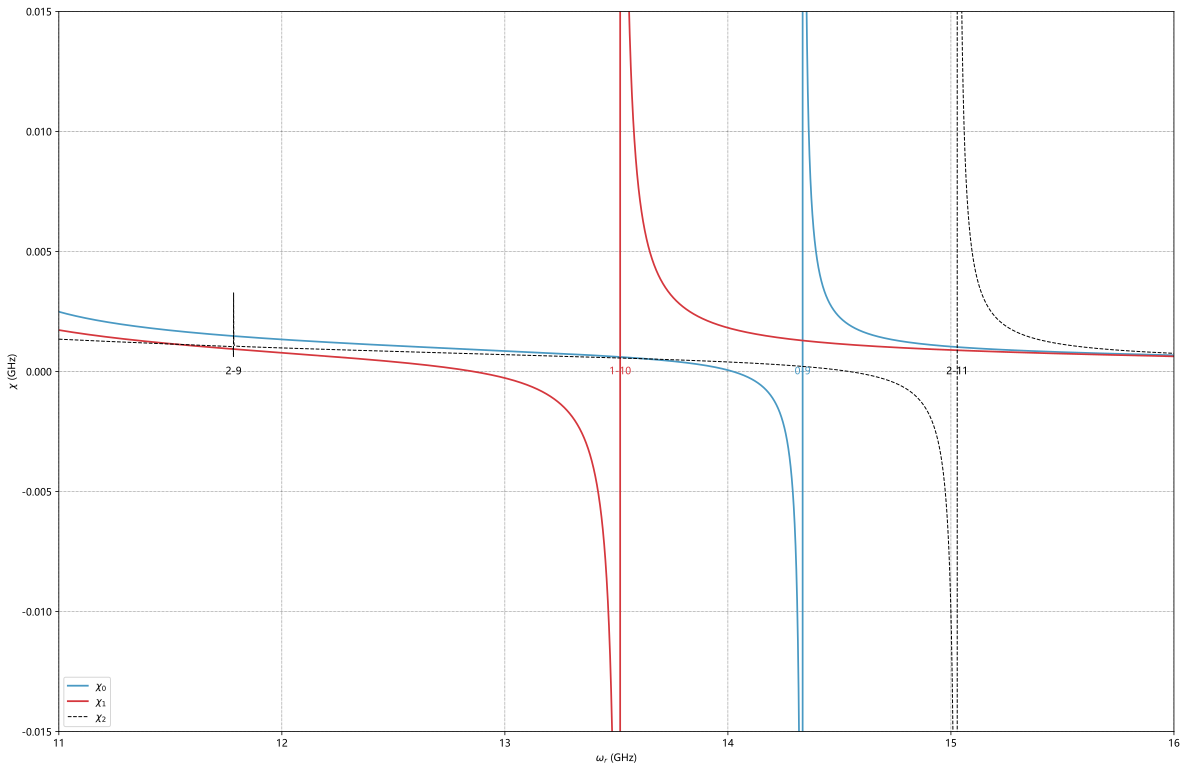

In [34]:
import matplotlib.pyplot as plt
fig,ax= plt.subplots(1,1,figsize=(20,13))
n_evals = 20
qbt0 = scqubits.Fluxonium(EJ = 4,EC = 4/2.0,EL = 4/30, cutoff = 110,flux = 0,truncated_dim=n_evals)
matrix0 =  qbt0.matrixelement_table(operator = "n_operator",evals_count=n_evals)
evals0 = qbt0.eigenvals(n_evals)
Er_list = np.linspace(11,16,int(1e4))
ylim  = (-0.015,0.015) # in GHz
for ql  in [0,1,2]:
    shift_from_qubit_transition = []
    for Er in tqdm(Er_list, desc = "Er loop"):
        shifts = [get_shift_accurate(matrix0[ql,ql2], evals0[ql2], evals0[ql], Er) for ql2 in range(n_evals)] 
        shift_from_qubit_transition.append(sum(shifts)/100)
    ax.plot(Er_list, 2*np.pi* np.array(shift_from_qubit_transition), label=rf'$\chi_{ql}$',color = colors[ql], linestyle = linestyles[ql],linewidth = linewidth_list[ql])
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax.set_xlim(Er_list[0],Er_list[-1])
ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel(rf'$\omega_r$')
ax.legend(loc= 'lower left')
ax.set_xlabel(rf'$\omega_r$ (GHz)')
ax.set_yticklabels([f'{val:.3f}' for val in ax.get_yticks()])
ax.set_ylabel(r'$\chi$ (GHz)')
y_offset = -0.000
x_offset = 0.0
for i in [0,1,2]:
    allowed_j = [i + 1+ 2*n for n in range(10) if i + 1+ 2*n < n_evals]
    for j in allowed_j:
        freq = evals0[j]-evals0[i]
        if freq > Er_list[0] and freq < Er_list[-1]:
            ax.text(freq+x_offset, 2*np.pi* y_offset,f"{i}-{j}",color = colors[i],ha='center',va='center')